In [132]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sympy.stats import Bernoulli, sample_iter

11. We defined a new variable based on weight (in pounds):

```
heavy = weight > 200 # 1 or 0
```

and then ran a logistic regression, predicting “heavy” from height (in inches):

```sh
glm(formula = heavy ~ height, family = binomial(link = "logit"))
            coef.est coef.se
(Intercept) -21.51     1.60
height        0.28     0.02
---
  n = 1984, k = 2
```

(a) Graph the logistic regression curve (the probability that someone is heavy) over the approximate range of the data. Be clear where the line goes through the 50% probability point.

(b) Fill in the blank: near the 50% point, comparing two people who differ by one inch in height, you’ll expect a difference of ____ in the probability of being heavy.

#### Responses

In [23]:
toprob = lambda m: np.exp(m) / (1 + np.exp(m))

x = np.linspace(48,84, 84-47, endpoint=True)
y = np.array([toprob(random.normalvariate(-21.51, 1.6) + random.normalvariate(0.28, 0.02)*z) for z in x] )

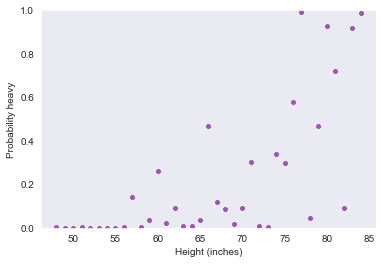

In [88]:

sns.set_style("dark")
ax = sns.scatterplot(x, y, cmap=cmap, facecolors="#9b59b6")
ax.set(xlabel='Height (inches)', ylabel='Probability heavy', ylim=[0,1])
plt.show()

#### Simulated values + logistic curve + 50% probaility line

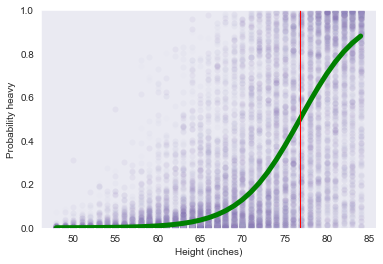

In [130]:
x = np.linspace(48,84, 84-47, endpoint=True)
sns.set_palette("Purples")
for i in range(500):
    y = [toprob(random.normalvariate(-21.51, 1.6) + random.normalvariate(0.28, 0.02)*z) for z in x]
    ax = sns.scatterplot(x,y, alpha=0.05, linewidth=0)

sns.set_style("dark")
yhat = [toprob(-21.51 + (0.28 * x)) for x in range(48,85)]
plt.plot(x, yhat, linewidth=5, c='green', alpha=1)
plt.plot([21.51/0.28, 21.51/0.28], [0,1], linewidth=1, c='red', alpha=1)  
ax.set(xlabel='Height (inches)', ylabel='Probability heavy', ylim=[0,1])
plt.show()

#### Boostrap confidence interval

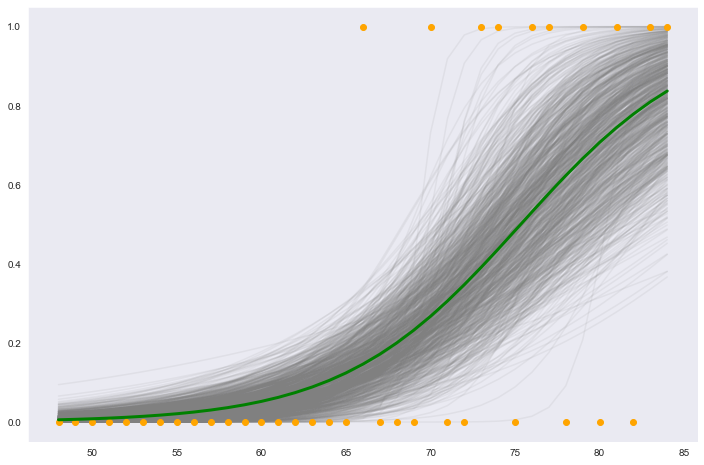

In [179]:
x = np.linspace(48,84, 84-47, endpoint=True)
y = np.array([True if list(sample_iter(Bernoulli('X', v), numsamples=1))[0] else False for v in [toprob(random.normalvariate(-21.51, 1.6) + random.normalvariate(0.28, 0.02)*z) for z in x]])

X = np.vstack([x, np.ones(len(x))]).T

plt.figure(figsize=(12,8))

for i in range(0, 1000):
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    lr = LogisticRegression()
    lr.fit(X_samples, y_samples)
    yh = lr.predict_proba(X)[:,1]
    plt.plot(x, yh, color='grey', alpha=0.1, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

lr = LogisticRegression()
lr.fit(X, y)
plt.plot(x, lr.predict_proba(X)[:,1], color='green', linewidth=3, zorder=5)
plt.show()